# Classifying movie reviews: a binary classification  
_<span style="float:right; font-size:12px;">Norine NDOUDI</span>_

### **Loading the IMDB dataset**

In [2]:
from keras.datasets import imdb

#Load the data from the Internet Movie Database
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#Decoded some reviews
word_index = imdb.get_word_index()                                    
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])            
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])    

print(decoded_review)
print("Negative (0) or Positive (1) review: " + str(train_labels[2]))
print(train_data.shape)
print(train_labels.shape)

? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life
Negative (0) or Positive (1) review: 0
(25000,)
(25000,)


### **Preparing the data**

In [3]:
import numpy as np

#vectorizing the data, turning the lists of data into tensors.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

#Each element of the vector indicates the presence or absence of a specific word among the 10,000 most frequent words in the IMDB dataset.
x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(x_train.shape)
print(y_train.shape)
print(len(x_train[24999]))
print(y_train[3])

(25000, 10000)
(25000,)
10000
1.0


### **Building the neural network**

In [70]:
from keras import models
from keras import layers

#Create our mode
model = models.Sequential()

#Add a fully connected layer of 16 neurons which has for input elements with the dimension of input vectors after vectorization.
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

#Add a second fully connected layer, the data from the first layer is transmitted to this one.
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(16, activation='relu'))

#Add a last layer that will output the scalar prediction between 0 and 1.
#The probability that the sentiment of the current review belongs to the positive class.  
model.add(layers.Dense(1, activation='sigmoid'))

To try further experiments, I add a third layer to see how doing so affects validation and test accuracy.

### **Choosing a loss function and an optimizer**

In [71]:
#Configure the model with the rmsprop optimizer and the binary_crossentropy loss function. 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

### **Training the model**

In [4]:
#Create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(x_val.shape)
print(y_val.shape)
print(partial_x_train.shape)
print(partial_y_train.shape)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

(10000, 10000)
(10000,)
(15000, 10000)
(15000,)


### **Plotting the training and validation loss**

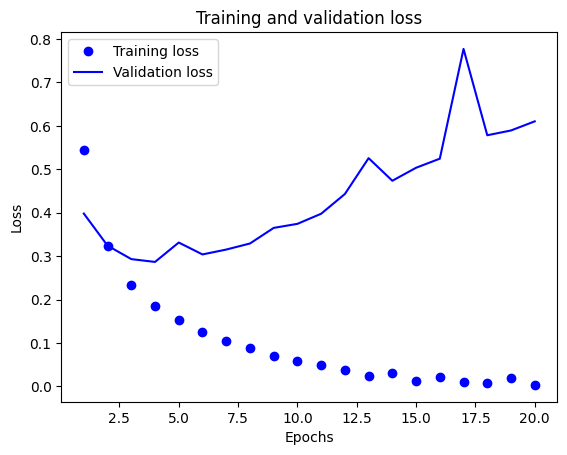

In [73]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### **Plotting the training and validation accuracy**

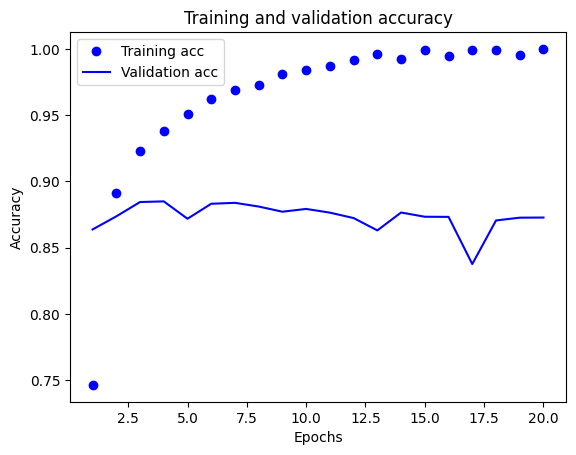

In [74]:
plt.clf()                                      
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The training loss decreases with every epoch, and the training accuracy increases with every epoch.  
However,the validation loss and accuracy seem to peak at about the fourth epoch in my case like the data of the book even with 3 hidden layers.
To prevent overfitting, we will stop training after four epochs. So, we will train a new network from scratch for four epochs and then evaluate it on the test data.

### **Retraining a model from scratch for four epochs**

In [79]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

#Evaluate it on the test data.
results = model.evaluate(x_test, y_test)

results

Epoch 1/5
49/49 [==============================] - 15s 62ms/step - loss: 0.4812 - accuracy: 0.8021
Epoch 2/5
49/49 [==============================] - 3s 60ms/step - loss: 0.2748 - accuracy: 0.9006
Epoch 3/5
49/49 [==============================] - 3s 61ms/step - loss: 0.2130 - accuracy: 0.9212
Epoch 4/5
49/49 [==============================] - 3s 61ms/step - loss: 0.1791 - accuracy: 0.9352
Epoch 5/5
782/782 [==============================] - 13s 10ms/step - loss: 0.3062 - accuracy: 0.8815


[0.3061527609825134, 0.8814799785614014]

The average loss is about 29% and we have an accuracy of about 88%. The model correctly classified **88%** of the test set examples.  
I tried with more hidden units (32) but it decreased of 1% the accuracy result.

### **Predictions on new data**

In [80]:
#Generate the likelihood of reviews being positive
model.predict(x_test)

782/782 [==============================] - 15s 5ms/step


array([[0.1746692 ],
       [0.99959546],
       [0.8952014 ],
       ...,
       [0.09493549],
       [0.0445327 ],
       [0.68113077]], dtype=float32)

The network is confident for some samples (0.99 or more, or 0.04 or less) but less confident for others (0.6).
The first review of the test data would be a negative one and second review a positive one.